# Étude de quelques oscillateurs avec [lcapy](https://lcapy.readthedocs.io/en/latest/overview.html)

On commence par dessiner le circuit electrique en utilisant l'objet [Circuit](https://lcapy.readthedocs.io/en/latest/circuits.html) qui utilise différents [éléments](https://lcapy.readthedocs.io/en/latest/schematics.html#schtex). 

La commande `color=lightgray` est adaptée si vous visualisez dans un thème sombre, sinon adaptez la couleur à votre environnement. 

La commande `Label_nodes=True` ou `Label_nodes=None` permet de visualiser les noms des nœuds ou non.

La commande `draw_nodes=connections` montrera des points qu'aux connexions, pour les enlever tous on utilise `False` ou les afficher tous `True`.

La commande `label_ids=True` permet de visualiser les étiquettes qu'on peut rajouter au nœuds.

Cette exemple est copié [d'ici](https://github.com/mph-/lcapy/blob/master/doc/examples/notebooks/RC-hpf1.ipynb).

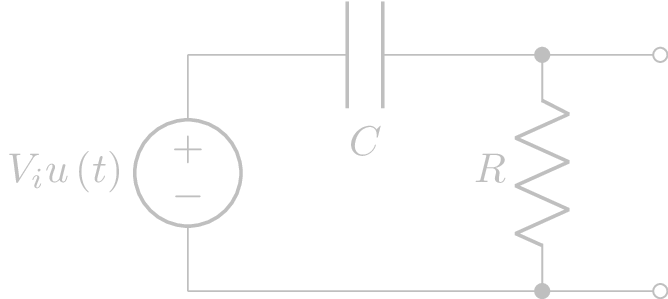

In [3]:
from lcapy import Circuit, j, omega, s

cct = Circuit("""
    Vi 1 0_1 step; down
    C 1 2; rigth=1.5
    R 2 0; down
    W 0_1 0; right=1.5
    W 0 0_2; right=0.5
    P1 2_2 0_2; down
    W 2 2_2; right=0.5
    ; color=lightgray, draw_nodes=connections, label_ids=False, label_nodes=False""")

cct.draw()

In [4]:
H = (cct.R.V(s) / cct.Vi.V(s)).simplify(); H

  C⋅R⋅s  
─────────
C⋅R⋅s + 1

In [5]:
H(j*omega)

  ⅉ⋅C⋅R⋅ω  
───────────
ⅉ⋅C⋅R⋅ω + 1

In [6]:
H(j*omega).rationalize_denominator()

 2  2  2          
C ⋅R ⋅ω  + ⅉ⋅C⋅R⋅ω
──────────────────
    2  2  2       
   C ⋅R ⋅ω  + 1   

In [7]:
H1 = H.subs([('C', 1e-6), ('R', 1e3)])
H1(j*omega).simplify()

    ω     
──────────
ω - 1000⋅ⅉ

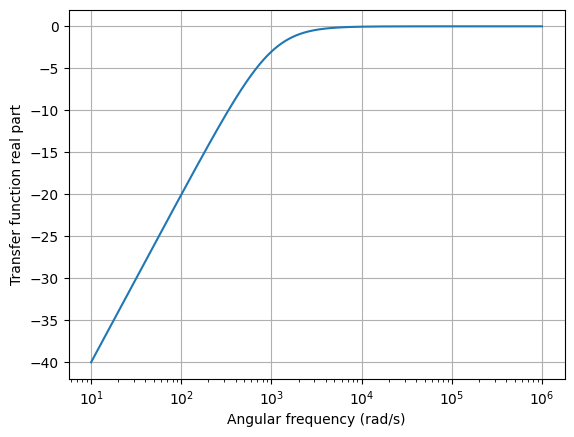

In [8]:
from numpy import logspace
w = logspace(1,6, 500)
ax = H1(j*omega).dB.plot(w, log_frequency=True)

# Autre exemple

Tiré  [de la documentation](https://lcapy.readthedocs.io/en/latest/circuits.html).

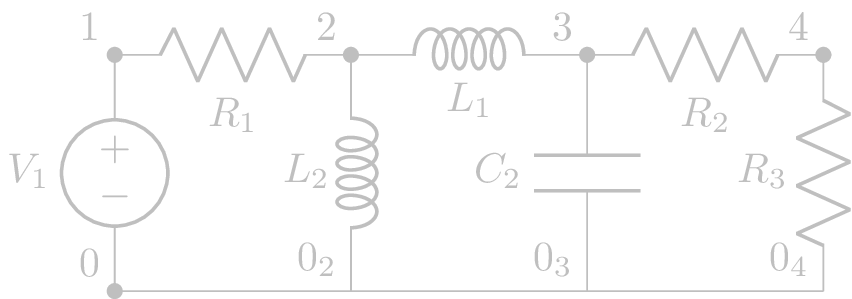

In [9]:
cct = Circuit("""
    V1 1 0; down
    R1 1 2; right
    L1 2 3; right
    R2 3 4; right
    L2 2 0_2; down
    C2 3 0_3; down
    R3 4 0_4; down
    W 0 0_2; right
    W 0_2 0_3; right
    W 0_3 0_4; right
    ; color=lightgray, label_nodes=True""")

cct.draw()

In [10]:
l = cct.mesh_analysis()
for eq in l.mesh_equations_list():
    eq.pprint()

zoo⋅(-I₁ + I₃) = 0
-I₂⋅R₁ + V₁ = 0
-I₃⋅R₂ - I₃⋅R₃ + zoo⋅(-I₁ + I₃) = 0


In [11]:
n = cct.laplace().nodal_analysis()
n.nodal_equations()

⎧           V₁     -V₁(s) + V₂(s)   V₂(s)   V₂(s) - V₃(s)                     
⎨1: V₁(s) = ──, 2: ────────────── + ───── + ───────────── = 0, 3: C₂⋅s⋅V₃(s) +
⎩           s            R₁          L₂⋅s        L₁⋅s                         

 V₃(s) - V₄(s)   -V₂(s) + V₃(s)         V₄(s)   -V₃(s) + V₄(s)    ⎫
 ───────────── + ────────────── = 0, 4: ───── + ────────────── = 0⎬
       R₂             L₁⋅s                R₃          R₂          ⎭

In [2]:
from lcapy import one
one * 2/3

2/3